# Introduction

Testing PPO on cartpole

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score) = (25, -71.61205169783713)
(episode, score) = (50, -80.46769857984333)
(episode, score) = (75, -231.54413060762332)
(episode, score) = (100, 69.06172952043066)
(episode, score) = (125, -10.85596865871472)
(episode, score) = (150, -60.44925891223474)
(episode, score) = (175, -106.35945809882654)
(episode, score) = (200, -161.14075590224135)
(episode, score) = (225, -19.320274191199324)
(episode, score) = (250, -51.023489868252554)
(episode, score) = (275, 34.451771503905604)
(episode, score) = (300, -273.7082883784294)
(episode, score) = (325, 94.39984517204022)
(episode, score) = (350, -259.0902116032943)
(episode, score) = (375, -418.8823211362015)
(episode, score) = (400, -62.30054431182107)
(episode, score) = (425, 100.3508815394656)
(episode, score) = (450, 26.696209449512423)
(episode, score) = (475, 31.434756068341045)
(episode, score) = (500, 84.42685349483355)
(epi

(episode, score) = (4500, 20.890870956890666)
(episode, score) = (4525, 3.641137186003185)
(episode, score) = (4550, -50.58131457952871)
(episode, score) = (4575, 5.325075496362469)
(episode, score) = (4600, -41.07784429304074)
(episode, score) = (4625, 86.25572623126914)
(episode, score) = (4650, -14.159303317644316)
(episode, score) = (4675, 35.2302536278174)
(episode, score) = (4700, -19.91162770291461)
(episode, score) = (4725, 58.892615653595485)
(episode, score) = (4750, 18.040020173576416)
(episode, score) = (4775, 76.24000069670171)
(episode, score) = (4800, 4.243190576111854)
(episode, score) = (4825, -6.231414170537433)
(episode, score) = (4850, -31.567820426083646)
(episode, score) = (4875, 29.8768947740583)
(episode, score) = (4900, -25.284111227761898)
(episode, score) = (4925, 48.17180593996454)
(episode, score) = (4950, -37.459783601633035)
(episode, score) = (4975, 31.14798572857076)
(episode, score) = (5000, 56.02697927630821)
(episode, score) = (5025, 69.9904780114518

(episode, score) = (9000, 41.6970987718484)
(episode, score) = (9025, -84.69036794969963)
(episode, score) = (9050, -48.26406407809529)
(episode, score) = (9075, 17.100213831623208)
(episode, score) = (9100, -15.157090381920707)
(episode, score) = (9125, 18.548203110149757)
(episode, score) = (9150, -55.217092136698966)
(episode, score) = (9175, -32.13662910344979)
(episode, score) = (9200, -43.47607396932127)
(episode, score) = (9225, -24.326036034005686)
(episode, score) = (9250, 70.86467524339189)
(episode, score) = (9275, -22.69680392842281)
(episode, score) = (9300, 23.031472696091114)
(episode, score) = (9325, -9.763123698970686)
(episode, score) = (9350, 43.47409031873821)
(episode, score) = (9375, 41.32542760084506)
(episode, score) = (9400, -33.158237025626306)
(episode, score) = (9425, 51.032712095426554)
(episode, score) = (9450, 43.19914629000853)
(episode, score) = (9475, 84.28107983668247)
(episode, score) = (9500, -35.42772598443749)
(episode, score) = (9525, 60.90334556

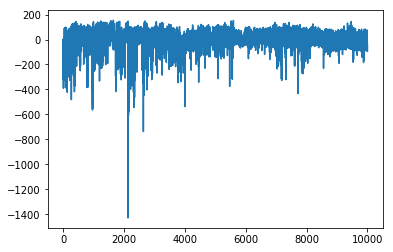

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gym
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
import keras.optimizers 
from keras import backend as K
from agent import Agent
%matplotlib inline


#Env
env = gym.make('LunarLander-v2')
num_states, num_actions = env.observation_space.shape[0], env.action_space.n
input_dim, output_dim = num_states, num_actions

#Agent
lr, gamma, loss_clipping, c1 = 0.001, 0.99, 0.2, 0.001
agent = Agent(input_dim, output_dim, lr, gamma, loss_clipping, c1)

#Train
EPISODES = 10**4
scores = []
for e in range(1,EPISODES+1):
    state = env.reset()
    state = np.reshape(state, [1, num_states])
    reward_sum = 0
    done = False
    while not done:
        # env.render()
        action, pi_vec = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        reward_sum += reward
        next_state = np.reshape(next_state, [1, num_states])
        agent.remember(state[0], action, pi_vec, reward)
        state = next_state
    agent.train_models()
    scores.append(reward_sum)
    if e % 25 == 0:
        print '(episode, score) = ' + str((e,reward_sum))
plt.plot(scores)
np.savetxt('stats/scores_lunar_lander.txt',scores)

### Compare to A2C

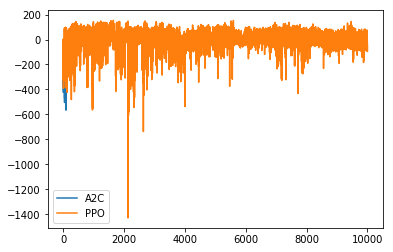

In [8]:
#I computed the scores for the regular policy gradient in the, well, 'policy-gradient' foldee ;P
filename = '/home/kokeeffe/research/RL-practice-keras/A2C/value_function_baseline/stats/scores_lunar_landing.txt'
scores_regular = np.loadtxt(filename)
plt.plot(scores_regular)
plt.plot(scores)
plt.legend(['A2C','PPO'])

1. Ok, PPO learns faster, but it looks less stable. But I haven't done any hyperparameter tuning.
2. Its also not entirely apples-to-apples; I include an entropy term in PPO. 
3. This is all for a single agent, btw. I must do parallel next.

### Watch a smart agent

In [8]:
state = env.reset()
state = np.reshape(state, [1, num_states])
reward_sum = 0
done = False
while not done:
    env.render()
    action = agent.act(state)
    next_state, reward, done, _ = env.step(action)
    reward_sum += reward
    next_state = np.reshape(next_state, [1, num_states])
    agent.remember(state[0], action, reward)
    state = next_state
env.close()

### Hyperpar search